In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# #  Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing


In [7]:
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x,flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [16]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove numbers

In [17]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '',regex=True)

In [18]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords  (nltk=natural language tool kit)

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords

In [23]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()


In [24]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [26]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [29]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [30]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [31]:
from collections import Counter
vocab = Counter()

In [32]:
vocab

Counter()

In [33]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [34]:
len(vocab)

15949

In [35]:
data.shape

(7920, 3)

In [36]:
tokens = [key for key in vocab if vocab[key] > 10]

In [37]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [38]:
len(tokens)

1145

In [39]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [41]:
X = data['tweet']
y = data['label']

In [42]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [43]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [45]:
!pip install scikit-learn

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
X_train.shape

(6336,)

In [52]:
X_test.shape

(1584,)

In [53]:
y_train.shape

(6336,)

In [54]:
y_test.shape

(1584,)

In [55]:
X_train

7613    one swear vscocam vsco vscophil littleprinceda...
6274    earli christmasbirthday present iphon appl sam...
6932     way would get iphon droid droidlif appl siri lol
1352    wifi hake password android app unitedst cute c...
1929                        ive charger phone theyv broke
                              ...                        
2172    happi got job newjob job samsung recept futur ...
1946    america go hack soni see theinterviewmovi sony...
7616    new camera lblogger bblogger samsung camera ne...
561     koncno je prisel moj iii nazaj servisa happi c...
4910    wast whole hour life look appstor altern app a...
Name: tweet, Length: 6336, dtype: object

In [56]:
y_train

7613    0
6274    0
6932    1
1352    0
1929    1
       ..
2172    0
1946    1
7616    0
561     0
4910    1
Name: label, Length: 6336, dtype: int64

### Vectorization

In [57]:
def vectorizer(ds, vocabulary) :
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)) :
            if vocabulary[i] in sentence.split() :
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [58]:
vectorized_x_train = vectorizer(X_train, tokens)

In [59]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [60]:
vectorized_x_test = vectorizer(X_test, tokens)

In [61]:
vectorized_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_train

7613    0
6274    0
6932    1
1352    0
1929    1
       ..
2172    0
1946    1
7616    0
561     0
4910    1
Name: label, Length: 6336, dtype: int64

In [63]:
y_test

345     0
2110    0
3657    0
6947    0
4366    1
       ..
7277    1
7561    0
3927    0
5928    0
7038    0
Name: label, Length: 1584, dtype: int64

In [65]:
y_train.value_counts()

label
0    4698
1    1638
Name: count, dtype: int64

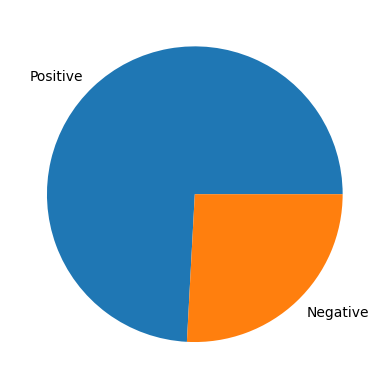

In [68]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [69]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.0 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 235.5/258.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 3.2 MB/s eta 0:00:00


In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9396, 1145) (9396,)


In [71]:
y_train_smote.value_counts()

label
0    4698
1    4698
Name: count, dtype: int64

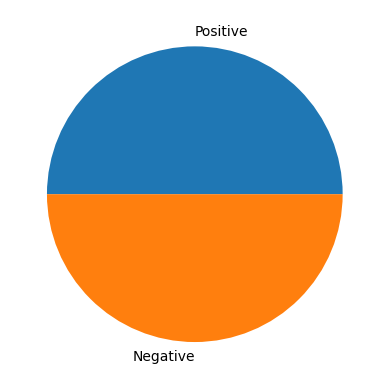

In [72]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [73]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
y_train_smote

0       0
1       0
2       1
3       0
4       1
       ..
9391    1
9392    1
9393    1
9394    1
9395    1
Name: label, Length: 9396, dtype: int64

In [77]:
vectorized_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
y_test

345     0
2110    0
3657    0
6947    0
4366    1
       ..
7277    1
7561    0
3927    0
5928    0
7038    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [96]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred) :
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred) :
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [98]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 0.938
	Precision = 0.916
	Recall = 0.964
	F1-Score = 0.939
Testing Score:
	Accuracy = 0.872
	Precision = 0.687
	Recall = 0.876
	F1-Score = 0.77


### Multinomial Naive Bayes

In [99]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 0.908
	Precision = 0.872
	Recall = 0.957
	F1-Score = 0.912
Testing Score:
	Accuracy = 0.865
	Precision = 0.658
	Recall = 0.933
	F1-Score = 0.772


### Decision Tree

In [101]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score:
	Accuracy = 0.831
	Precision = 0.655
	Recall = 0.66
	F1-Score = 0.657


### Random Forest

In [102]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score:
	Accuracy = 0.866
	Precision = 0.735
	Recall = 0.709
	F1-Score = 0.722


### Support Vector Machine

In [103]:
svm = SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.978
Testing Score:
	Accuracy = 0.878
	Precision = 0.717
	Recall = 0.825
	F1-Score = 0.767


In [104]:
import pickle

with open('../static/model/model.pickle', 'wb') as file :
    pickle.dump(lr, file)